In [36]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [37]:
servers = {
        'cairo': '20.25.37.239',
        'alex': '172.203.249.249',
        'psaid': '20.216.4.130'
    }
username = "sa"
password = "SQLServer123"
driver = "ODBC Driver 17 for SQL Server"
conn_strs = {
        'cairo': f"mssql+pyodbc://{username}:{password}@{servers['cairo']}/{'cairo'}?driver={driver}",
        'alex_replication': f"mssql+pyodbc://{username}:{password}@{servers['cairo']}/{'alex_replication'}?driver={driver}",
        'psaid': f"mssql+pyodbc://{username}:{password}@{servers['psaid']}/{'portsaid'}?driver={driver}",
        'cairo_replication': f"mssql+pyodbc://{username}:{password}@{servers['psaid']}/{'cairo_replication'}?driver={driver}",
        'alex': f"mssql+pyodbc://{username}:{password}@{servers['alex']}/{'Alexandria'}?driver={driver}",
        'port_replication': f"mssql+pyodbc://{username}:{password}@{servers['alex']}/{'port_replication'}?driver={driver}",
    }


c_engine = create_engine(conn_strs['cairo'])
c_con = c_engine.connect()
a_engine = create_engine(conn_strs['alex'])
a_con = a_engine.connect()
p_engine = create_engine(conn_strs['psaid'])
p_con = p_engine.connect()
connections = {
    "cairo": c_con,
    "alex": a_con,
    "psaid": p_con
}


In [38]:
sql_query = 'SELECT * FROM products'
cdf_products = pd.read_sql_query(sql_query, c_engine)
cdf_products

,id,p_name,price,sex
0,1,Valentino,50.0,female
1,2,Velvet,35.0,male
2,3,Horizon,15.0,male
3,4,Bentley,48.0,female
4,5,Surf,22.0,male
5,6,Giorgio,21.0,female
6,7,Emper,9.0,female
7,8,Legend,30.0,male
8,9,Aventure,10.0,male
9,10,Dunhill,40.0,male


In [39]:
adf_products = pd.read_sql_query(sql_query, a_engine)
adf_products

,id,p_name,price,sex
0,1,Valentino,50.0,female
1,2,Velvet,35.0,male
2,3,Horizon,15.0,male
3,4,Bentley,48.0,female
4,5,Surf,22.0,male
5,6,Giorgio,21.0,female
6,7,Emper,9.0,female
7,8,Legend,30.0,male
8,9,Aventure,10.0,male
9,10,Dunhill,40.0,male


In [40]:
pdf_products = pd.read_sql_query(sql_query, p_engine)
pdf_products

,id,p_name,price,sex
0,1,Valentino,50.0,female
1,2,Velvet,35.0,male
2,3,Horizon,15.0,male
3,4,Bentley,48.0,female
4,5,Surf,22.0,male
5,6,Giorgio,21.0,female
6,7,Emper,9.0,female
7,8,Legend,30.0,male
8,9,Aventure,10.0,male
9,10,Dunhill,40.0,male


In [41]:
sql_query = 'SELECT * FROM inventory'
cdf_inventory = pd.read_sql_query(sql_query, c_engine)
cdf_inventory

,pid,quantity
0,1,20
1,2,12
2,3,5
3,4,10
4,5,5
5,6,5
6,7,5
7,8,5
8,9,5
9,10,5


In [42]:
adf_inventory = pd.read_sql_query(sql_query, a_engine)
adf_inventory

,pid,quantity
0,1,14
1,2,5
2,3,5
3,4,16
4,5,5
5,6,5
6,7,5
7,8,5
8,9,5
9,10,6


In [43]:
pdf_inventory = pd.read_sql_query(sql_query, p_engine)
pdf_inventory

,pid,quantity
0,1,5
1,2,2
2,3,5
3,4,9
4,5,5
5,6,11
6,7,5
7,8,5
8,9,5
9,10,5


In [44]:
sql_query = 'SELECT * FROM transactions'
cdf_transactions = pd.read_sql_query(sql_query, c_engine)
cdf_transactions

,pid,quantity,p_state,p_timestamp
0,1,5,True,2023-12-26 23:40:40.000000
1,1,5,True,2023-12-26 23:41:17.000000
2,1,10,False,2023-12-26 23:41:40.000000
3,1,5,True,2023-12-27 08:33:37.250813
4,1,6,True,2023-12-27 20:05:49.794297
5,1,12,True,2023-12-27 20:05:50.154273
6,1,2,True,2023-12-27 20:09:31.646592
7,1,20,False,2023-12-27 21:56:41.763961
8,1,5,False,2023-12-27 21:59:24.175317
9,4,5,True,2023-12-27 09:55:53.013817


In [45]:
adf_transactions = pd.read_sql_query(sql_query, a_engine)
adf_transactions

,pid,quantity,p_state,p_timestamp
0,1,4,True,2023-12-26 21:58:22.370000
1,1,5,True,2023-12-27 08:34:06.988963
2,4,6,True,2023-12-27 07:43:54.194825
3,4,6,False,2023-12-27 07:47:48.618720
4,4,11,True,2023-12-27 07:48:11.398467
5,10,1,True,2023-12-26 21:19:08.223333


In [46]:
pdf_transactions = pd.read_sql_query(sql_query, p_engine)
pdf_transactions

,pid,quantity,p_state,p_timestamp
0,2,3,False,2023-12-27 09:54:32.918329
1,4,4,True,2023-12-26 21:18:37.310000
2,6,6,True,2023-12-27 09:49:41.078949


In [47]:
ptransactions_join = pd.merge(pdf_transactions, pdf_products ,left_on="pid", right_on='id', how='inner')
ptransactions_join

,pid,quantity,p_state,p_timestamp,id,p_name,price,sex
0,2,3,False,2023-12-27 09:54:32.918329,2,Velvet,35.0,male
1,4,4,True,2023-12-26 21:18:37.310000,4,Bentley,48.0,female
2,6,6,True,2023-12-27 09:49:41.078949,6,Giorgio,21.0,female


In [48]:
atransactions_join = pd.merge(adf_transactions, adf_products ,left_on="pid", right_on='id', how='inner')
atransactions_join

,pid,quantity,p_state,p_timestamp,id,p_name,price,sex
0,1,4,True,2023-12-26 21:58:22.370000,1,Valentino,50.0,female
1,1,5,True,2023-12-27 08:34:06.988963,1,Valentino,50.0,female
2,4,6,True,2023-12-27 07:43:54.194825,4,Bentley,48.0,female
3,4,6,False,2023-12-27 07:47:48.618720,4,Bentley,48.0,female
4,4,11,True,2023-12-27 07:48:11.398467,4,Bentley,48.0,female
5,10,1,True,2023-12-26 21:19:08.223333,10,Dunhill,40.0,male


In [49]:
ctransactions_join = pd.merge(cdf_transactions, cdf_products ,left_on="pid", right_on='id', how='inner')
ctransactions_join

,pid,quantity,p_state,p_timestamp,id,p_name,price,sex
0,1,5,True,2023-12-26 23:40:40.000000,1,Valentino,50.0,female
1,1,5,True,2023-12-26 23:41:17.000000,1,Valentino,50.0,female
2,1,10,False,2023-12-26 23:41:40.000000,1,Valentino,50.0,female
3,1,5,True,2023-12-27 08:33:37.250813,1,Valentino,50.0,female
4,1,6,True,2023-12-27 20:05:49.794297,1,Valentino,50.0,female
5,1,12,True,2023-12-27 20:05:50.154273,1,Valentino,50.0,female
6,1,2,True,2023-12-27 20:09:31.646592,1,Valentino,50.0,female
7,1,20,False,2023-12-27 21:56:41.763961,1,Valentino,50.0,female
8,1,5,False,2023-12-27 21:59:24.175317,1,Valentino,50.0,female
9,4,5,True,2023-12-27 09:55:53.013817,4,Bentley,48.0,female


In [50]:
union_inventory = pd.concat([cdf_inventory, pdf_inventory,adf_inventory], axis=0, ignore_index=True)
union_transactions = pd.concat([cdf_transactions, pdf_transactions,adf_transactions], axis=0, ignore_index=True)


In [51]:
transactions_join = pd.merge(union_transactions, adf_products ,left_on="pid", right_on='id', how='inner')
transactions_join

,pid,quantity,p_state,p_timestamp,id,p_name,price,sex
0,1,5,True,2023-12-26 23:40:40.000000,1,Valentino,50.0,female
1,1,5,True,2023-12-26 23:41:17.000000,1,Valentino,50.0,female
2,1,10,False,2023-12-26 23:41:40.000000,1,Valentino,50.0,female
3,1,5,True,2023-12-27 08:33:37.250813,1,Valentino,50.0,female
4,1,6,True,2023-12-27 20:05:49.794297,1,Valentino,50.0,female
5,1,12,True,2023-12-27 20:05:50.154273,1,Valentino,50.0,female
6,1,2,True,2023-12-27 20:09:31.646592,1,Valentino,50.0,female
7,1,20,False,2023-12-27 21:56:41.763961,1,Valentino,50.0,female
8,1,5,False,2023-12-27 21:59:24.175317,1,Valentino,50.0,female
9,1,4,True,2023-12-26 21:58:22.370000,1,Valentino,50.0,female


In [52]:
grouped_data1 = ptransactions_join.groupby("sex")["quantity"].sum()
grouped_data2 = atransactions_join.groupby("sex")["quantity"].sum()
grouped_data3 = ptransactions_join.groupby("sex")["quantity"].sum()
grouped_data4 = transactions_join.groupby("sex")["quantity"].sum()

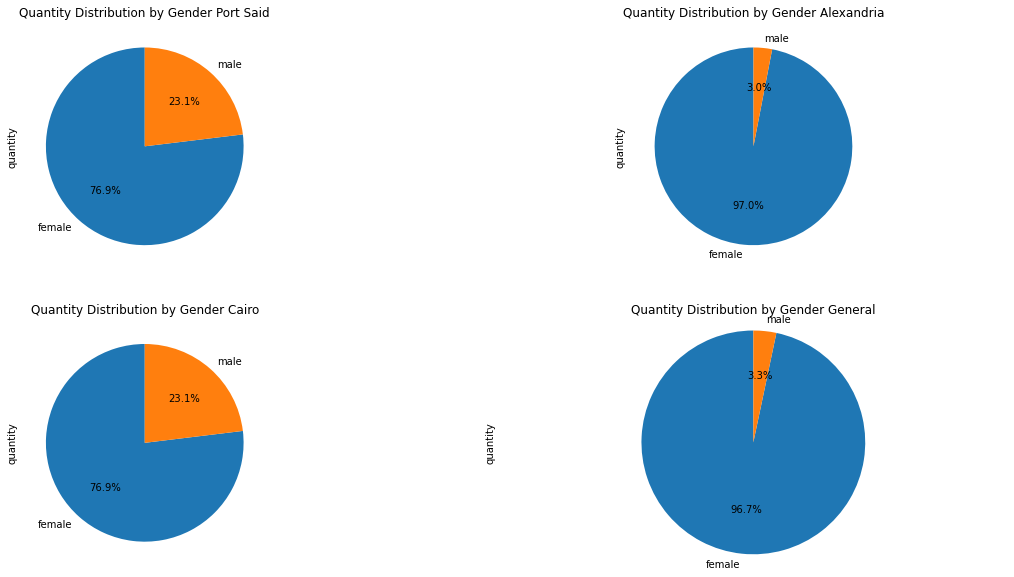

In [53]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

grouped_data1.plot(kind="pie", subplots=True, autopct='%1.1f%%', startangle=90, legend=False,ax=axes[0, 0])
axes[0, 0].set_title('Quantity Distribution by Gender Port Said')
axes[0, 0].set_facecolor('white')  # Set background color to white
grouped_data2.plot(kind="pie", subplots=True, autopct='%1.1f%%', startangle=90, legend=False,ax=axes[0, 1])
axes[0, 1].set_title('Quantity Distribution by Gender Alexandria')
grouped_data3.plot(kind="pie", subplots=True, autopct='%1.1f%%', startangle=90, legend=False,ax=axes[1, 0])
axes[1, 0].set_title('Quantity Distribution by Gender Cairo')
grouped_data4.plot(kind="pie", subplots=True, autopct='%1.1f%%', startangle=90, legend=False,ax=axes[1, 1])
axes[1, 1].set_title('Quantity Distribution by Gender General')


plt.axis('equal')

plt.show()


Text(0, 0.5, 'number of transactions')

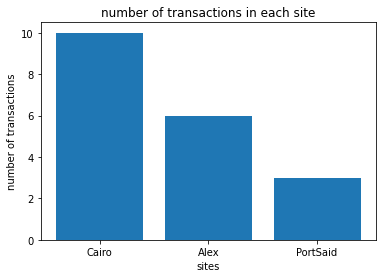

In [54]:
counts=[cdf_transactions.shape[0],adf_transactions.shape[0],pdf_transactions.shape[0]]
sites=["Cairo","Alex","PortSaid"]
plt.bar(sites,counts)
plt.title("number of transactions in each site")
plt.xlabel("sites")
plt.ylabel("number of transactions")

In [55]:
a=["cairo"]*10 +["PortSaid"]*10+["Alex"]*10

In [56]:
union_inventory["sites"]=a
union_inventory

,pid,quantity,sites
0,1,20,cairo
1,2,12,cairo
2,3,5,cairo
3,4,10,cairo
4,5,5,cairo
5,6,5,cairo
6,7,5,cairo
7,8,5,cairo
8,9,5,cairo
9,10,5,cairo


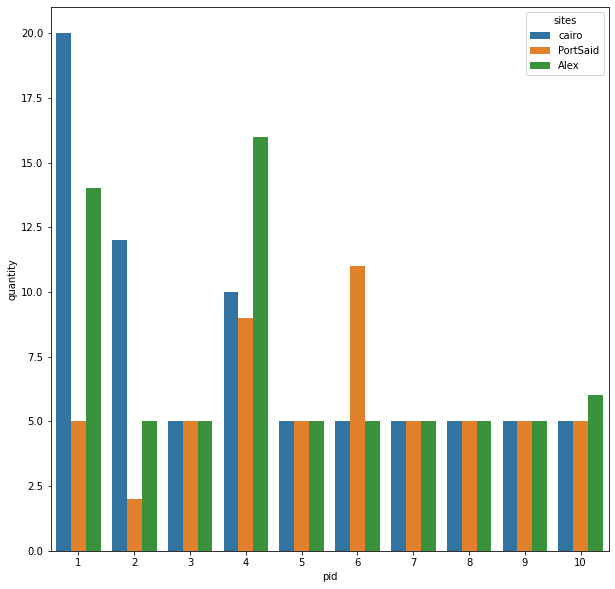

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(data=union_inventory,x="pid",y="quantity",hue="sites")
plt.show()